In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import openpyxl
import matplotlib.ticker as ticker

plt.style.use(['ieee','scatter','grid'])

In [112]:
# #import Test1.xlsx and make dataframe
# df = pd.read_excel('Test1.xlsx', sheet_name='Sheet1')
# df.dropna(how='all', inplace=True)

# units = df.iloc[0]
# new_columns = []
# for col, unit in zip(df.columns, units):
#     if pd.notna(unit):
#         new_columns.append(f"{col} {unit}")
#     else:
#         new_columns.append(col)

# df.columns = new_columns

# # Remove the row with units
# df.drop(df.index[0], inplace=True)

# df.dropna(axis=1, how='all', inplace=True)


# # Reset the index
# df.reset_index(drop=True, inplace=True)


# #display dataframe
# df
# #make new dataframe with only the columns we want

In [113]:
# #plot angular frequency(rad/s) on the x axis (log scale) and storage and loss moduli on the y axis
# fig, ax = plt.subplots()
# #convert to kpa
# df['Storage Modulus [Pa]'] = df['Storage Modulus [Pa]']/1000
# df['Loss Modulus [Pa]'] = df['Loss Modulus [Pa]']/1000

# ax.plot(df['Angular Frequency [rad/s]'], df['Storage Modulus [Pa]'], label='Storage modulus')
# ax.plot(df['Angular Frequency [rad/s]'], df['Loss Modulus [Pa]'], label='Loss modulus')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel('Angular frequency (rad/s)')
# ax.set_ylabel('Shear Modulus, G\', G" (Pa)',fontsize=13)
# plt.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value
# plt.savefig('modfreq.png', dpi=300, bbox_inches='tight')
# plt.show()



In [114]:
# #now sheet 2
# df2 = pd.read_excel('Test1.xlsx', sheet_name='Sheet2')
# df2.dropna(how='all', inplace=True)

# units = df2.iloc[0]
# new_columns = []
# for col, unit in zip(df2.columns, units):
#     if pd.notna(unit):
#         new_columns.append(f"{col} {unit}")
#     else:
#         new_columns.append(col)

# df2.columns = new_columns

# # Remove the row with units
# df2.drop(df2.index[0], inplace=True)

# df2.dropna(axis=1, how='all', inplace=True)


# # Reset the index
# df2.reset_index(drop=True, inplace=True)


# #display dataframe
# df2

In [115]:
# #plot temperature [°C] on x axis and viscosity [mPa·s] on y axis
# fig, ax = plt.subplots()
# df2['Viscosity [kPa·s]'] = df2['Viscosity [mPa·s]'] / (10^6)
# ax.plot(df2['Temperature [°C]'], df2['Viscosity [kPa·s]'], label='Viscosity')
# ax.set_xlabel('Temperature (°C)')
# ax.set_ylabel('Viscosity (kPa·s)')
# plt.savefig('tempvis.png', dpi=300, bbox_inches='tight')
# plt.show()


In [116]:
import pandas as pd

def process_sheet(df):
    df.dropna(how='all', inplace=True)
    units = df.iloc[0]
    new_columns = [f"{col} {unit}" if pd.notna(unit) else col for col, unit in zip(df.columns, units)]
    df.columns = new_columns
    #drop column 'Status'
    df = df.drop(columns=['Status'])
    df.drop(df.index[0], inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Print column names to verify
    # print("Processed columns:", df.columns.tolist())
    
    return df


def select_columns_for_plotting(df, sheet_name):
    # Define your logic here based on sheet_name to select columns
    selected_columns = []  # Add your logic here
    return df[selected_columns]

file_name = 'Testing1-29.xlsx'

# Load the Excel file once to fetch all sheet names and normalize them
xls = pd.ExcelFile(file_name)
available_sheets = {sheet.lower(): sheet for sheet in xls.sheet_names}  # Dictionary mapping lowercase to original names

conditions = ['0%', '5%', '10%', '15%', '20%', '25%']  # Adjust conditions as needed
test_types = ['Freq', 'Amp', 'Stress relaxation', 'Creep + relax', 'Temp']
# Generate lowercase sheet names for comparison
sheet_names = [f"{test_type.lower()} = {condition.lower()}" for condition in conditions for test_type in test_types]

dfs = {}

for sheet_name in sheet_names:
    try:
        original_sheet_name = available_sheets.get(sheet_name.lower())  # Use lowercase for comparison
        if original_sheet_name:
            df = pd.read_excel(file_name, sheet_name=original_sheet_name)
            processed_df = process_sheet(df)
            #get rid of column 'Status'
            # Use lowercase sheet name as the key for consistency
            dfs[original_sheet_name.lower()] = processed_df
        else:
            print(f"Sheet not found: {sheet_name}")
    except Exception as e:
        print(f"Error processing {sheet_name}: {e}")

# Now dfs contains a processed DataFrame for each sheet, using the original sheet names


Error processing temp = 5%: single positional indexer is out-of-bounds
Error processing freq = 10%: single positional indexer is out-of-bounds
Sheet not found: amp = 10%
Sheet not found: stress relaxation = 10%
Sheet not found: creep + relax = 10%
Sheet not found: temp = 10%
Error processing freq = 15%: single positional indexer is out-of-bounds
Sheet not found: amp = 15%
Sheet not found: stress relaxation = 15%
Sheet not found: creep + relax = 15%
Sheet not found: temp = 15%
Error processing freq = 20%: single positional indexer is out-of-bounds
Sheet not found: amp = 20%
Sheet not found: stress relaxation = 20%
Sheet not found: creep + relax = 20%
Sheet not found: temp = 20%
Error processing freq = 25%: single positional indexer is out-of-bounds
Sheet not found: amp = 25%
Sheet not found: stress relaxation = 25%
Sheet not found: creep + relax = 25%
Sheet not found: temp = 25%


# Frequency test

   Point No. Angular Frequency [rad/s] Storage Modulus [Pa] Loss Modulus [Pa]  \
0        1.0                       100               142110            133530   
1        2.0                      63.1               119140            126400   
2        3.0                      39.8                94973            118120   
3        4.0                      25.1                72832            110420   
4        5.0                      15.8                53700             99576   

  Loss Factor [1] Shear Strain [%] Shear Stress [Pa] Torque [mN·m]  
0            0.94                1            1952.7        8.9989  
1           1.061                1            1738.5        8.0119  
2           1.244                1            1515.5        6.9843  
3           1.516            0.992            1312.7        6.0493  
4           1.854            0.993              1124        5.1797  
   Point No. Angular Frequency [rad/s] Storage Modulus [Pa] Loss Modulus [Pa]  \
0        1.0      

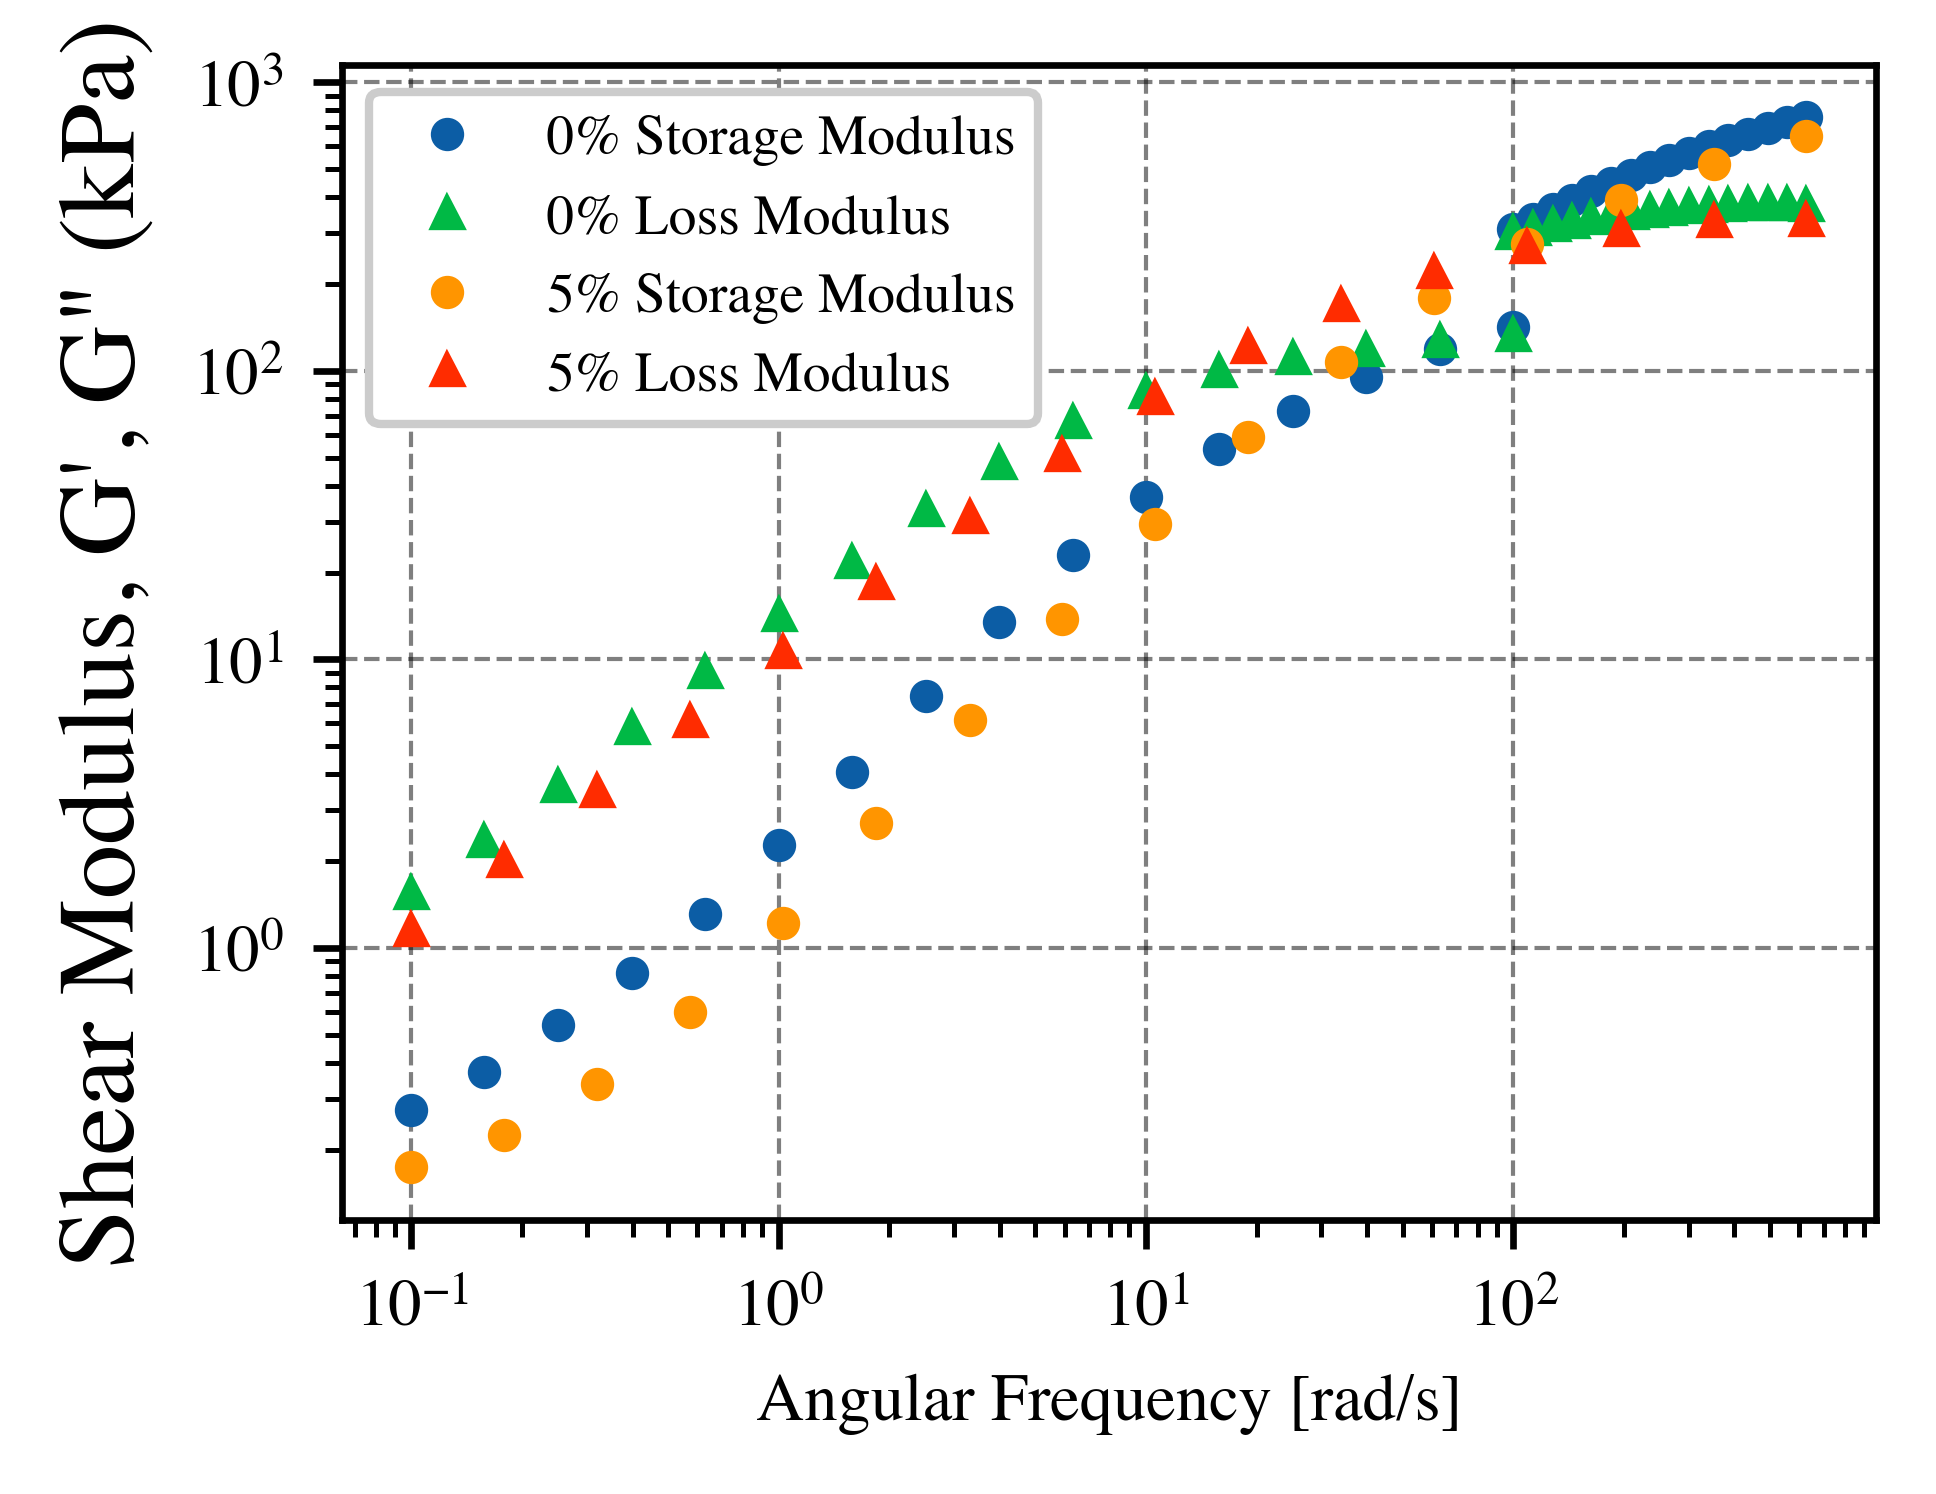

In [117]:
# Define the conditions and test types
conditions = ['0%', '5%', '10%', '15%', '20%', '25%']
test_type = 'Freq'

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the conditions
for condition in conditions:
    # Normalize the test name to lowercase to match the dictionary keys
    test_name_normalized = f"{test_type.lower()} = {condition.lower()}"

    # Access the DataFrame using the normalized test name
    specific_test_df = dfs.get(test_name_normalized)

    if specific_test_df is not None:
        # Now you can work with specific_test_df
        print(specific_test_df.head())  # Display the first few rows as an example

        # Convert 'Angular Frequency [rad/s]' column to numeric, assuming it's in the correct format
        specific_test_df['Angular Frequency [rad/s]'] = pd.to_numeric(specific_test_df['Angular Frequency [rad/s]'], errors='coerce')

        # Drop any rows that have NaN values in the columns we're interested in after conversion
        specific_test_df.dropna(subset=['Angular Frequency [rad/s]', 'Storage Modulus [Pa]', 'Loss Modulus [Pa]'], inplace=True)
        #convert to kpa
        specific_test_df['Storage Modulus [Pa]'] = specific_test_df['Storage Modulus [Pa]'] / 1000
        specific_test_df['Loss Modulus [Pa]'] = specific_test_df['Loss Modulus [Pa]'] / 1000

        # Scatter plot for Storage Modulus as circles
        ax.plot(specific_test_df['Angular Frequency [rad/s]'], specific_test_df['Storage Modulus [Pa]'], 'o', label=f'{condition} Storage Modulus')

        # Scatter plot for Loss Modulus as triangles
        ax.plot(specific_test_df['Angular Frequency [rad/s]'], specific_test_df['Loss Modulus [Pa]'], '^', label=f'{condition} Loss Modulus')

    else:
        print(f"DataFrame for {test_name_normalized} not found.")

# Set scale to log for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Adding title and labels
ax.set_xlabel('Angular Frequency [rad/s]')
ax.set_ylabel('Shear Modulus, G\', G" (kPa)', fontsize=13)

# Adding legend
ax.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value

# Show plot
plt.show()


# Amplitude test

   Point No. Shear Strain [1] Shear Stress [Pa] Storage Modulus [Pa]  \
0        1.0         0.000002          0.013399              0.37125   
1        2.0         0.000012           0.15165               1474.2   
2        3.0         0.000019           0.25772               1695.7   
3        4.0         0.000028           0.38896               2233.4   
4        5.0         0.000039           0.54233               2233.2   

  Loss Modulus [Pa] Loss Factor [1] Torque [µN·m]  
0            7424.9           20000       0.06175  
1             12097           8.206       0.69888  
2             13626           8.036        1.1877  
3             13518           6.053        1.7925  
4             13784           6.172        2.4993  
   Point No. Shear Strain [1] Shear Stress [Pa] Storage Modulus [Pa]  \
0        1.0         0.000003           0.40274                18012   
1        2.0          0.00002            1.6725                28218   
2        3.0         0.000025          

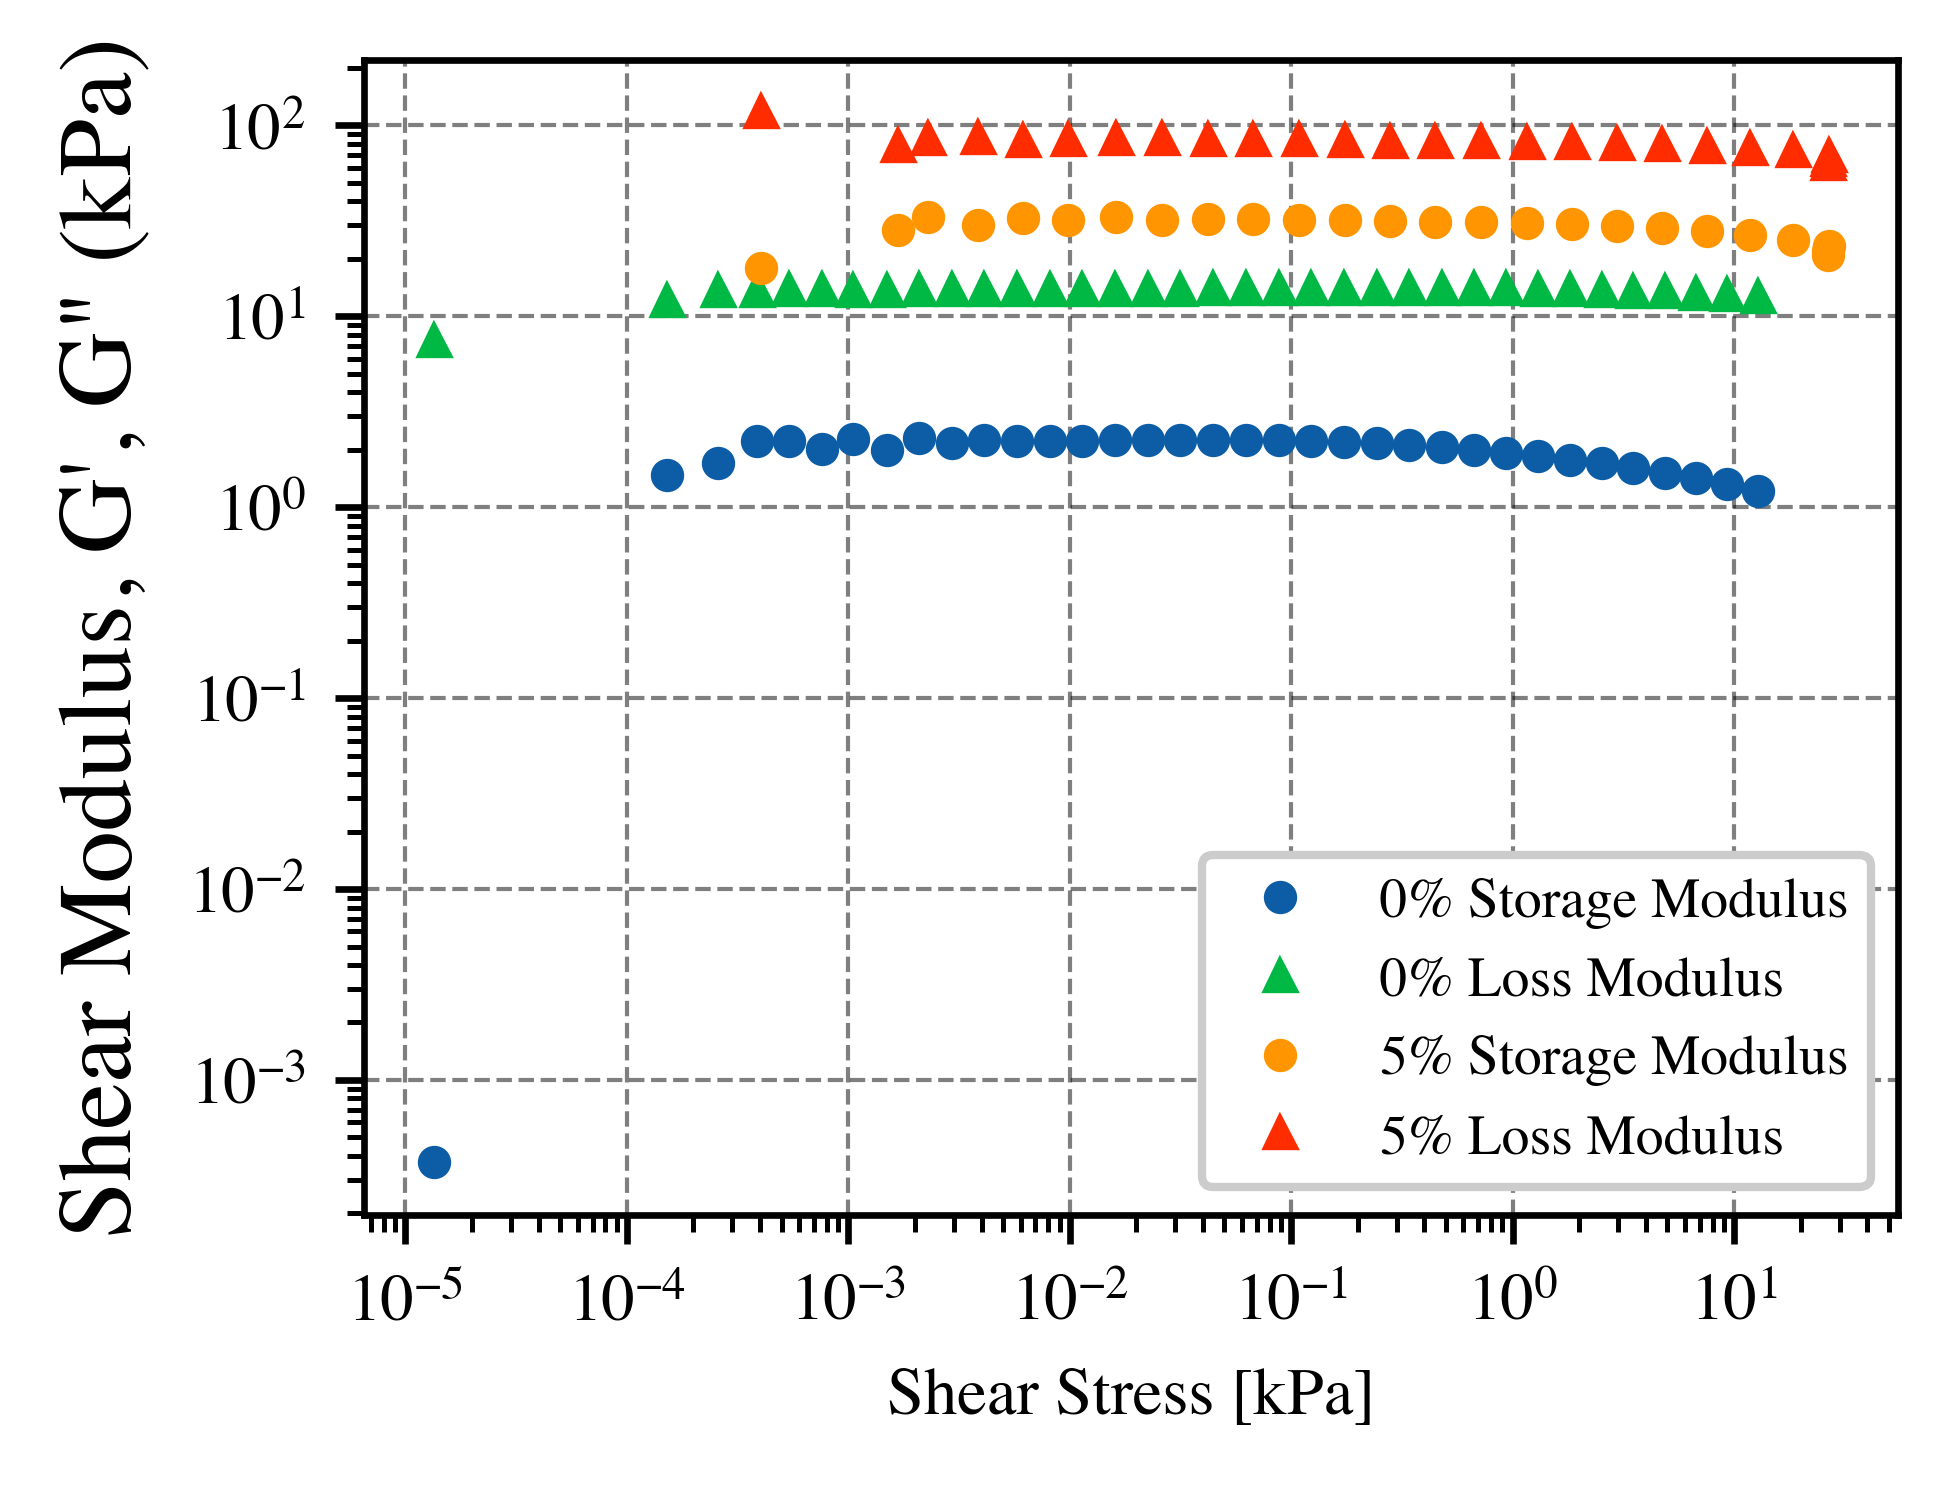

In [118]:
# Normalize the test name to lowercase to match the dictionary keys
test_type = 'Amp'

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the conditions
for condition in conditions:
    # Normalize the test name to lowercase to match the dictionary keys
    test_name_normalized = f"{test_type.lower()} = {condition.lower()}"

    # Access the DataFrame using the normalized test name
    specific_test_df = dfs.get(test_name_normalized)

    if specific_test_df is not None:
        # Now you can work with specific_test_df
        print(specific_test_df.head())  # Display the first few rows as an example

        # Convert 'Shear Stress [Pa]' column to numeric, assuming it's in the correct format
        specific_test_df['Shear Stress [Pa]'] = pd.to_numeric(specific_test_df['Shear Stress [Pa]'], errors='coerce')

        # Drop any rows that have NaN values in the columns we're interested in after conversion (storage and loss modulus and shear stress)
        specific_test_df.dropna(subset=['Shear Stress [Pa]', 'Storage Modulus [Pa]', 'Loss Modulus [Pa]'], inplace=True)
        #convert all to kpa
        specific_test_df['Shear Stress [Pa]'] = specific_test_df['Shear Stress [Pa]'] / 1000
        specific_test_df['Storage Modulus [Pa]'] = specific_test_df['Storage Modulus [Pa]'] / 1000
        specific_test_df['Loss Modulus [Pa]'] = specific_test_df['Loss Modulus [Pa]'] / 1000

        # Scatter plot for Storage Modulus as circles
        ax.plot(specific_test_df['Shear Stress [Pa]'], specific_test_df['Storage Modulus [Pa]'], 'o', label=f'{condition} Storage Modulus')

        # Scatter plot for Loss Modulus as triangles
        ax.plot(specific_test_df['Shear Stress [Pa]'], specific_test_df['Loss Modulus [Pa]'], '^', label=f'{condition} Loss Modulus')

    else:
        print(f"DataFrame for {test_name_normalized} not found.")

# Set scale to log for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Adding title and labels
ax.set_xlabel('Shear Stress [kPa]')
ax.set_ylabel('Shear Modulus, G\', G" (kPa)', fontsize=12.5)

# Adding legend
ax.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value

# Show plot
plt.show()

Stress relaxation test

   Point No. Time [s] Shear Strain [%] Shear Stress [Pa]  \
0        1.0     0.01            0.907            6196.7   
1        2.0    0.021             3.27             13806   
2        3.0    0.031              6.4             17789   
3        4.0    0.042             8.22             16079   
4        5.0    0.054             9.19             12283   

  Relaxation Modulus [Pa] Torque [mN·m]  
0                  682850        28.557  
1                  422290        63.624  
2                  277750         81.98  
3                  195550        74.099  
4                  133640        56.605  
   Point No. Time [s] Shear Strain [%] Shear Stress [Pa]  \
0        1.0     0.01            0.967            5626.5   
1        2.0    0.021             3.41             11901   
2        3.0    0.031              6.5             14577   
3        4.0    0.042             8.22             12777   
4        5.0    0.054             9.13            9587.2   

  Relaxation Modulus [Pa] 

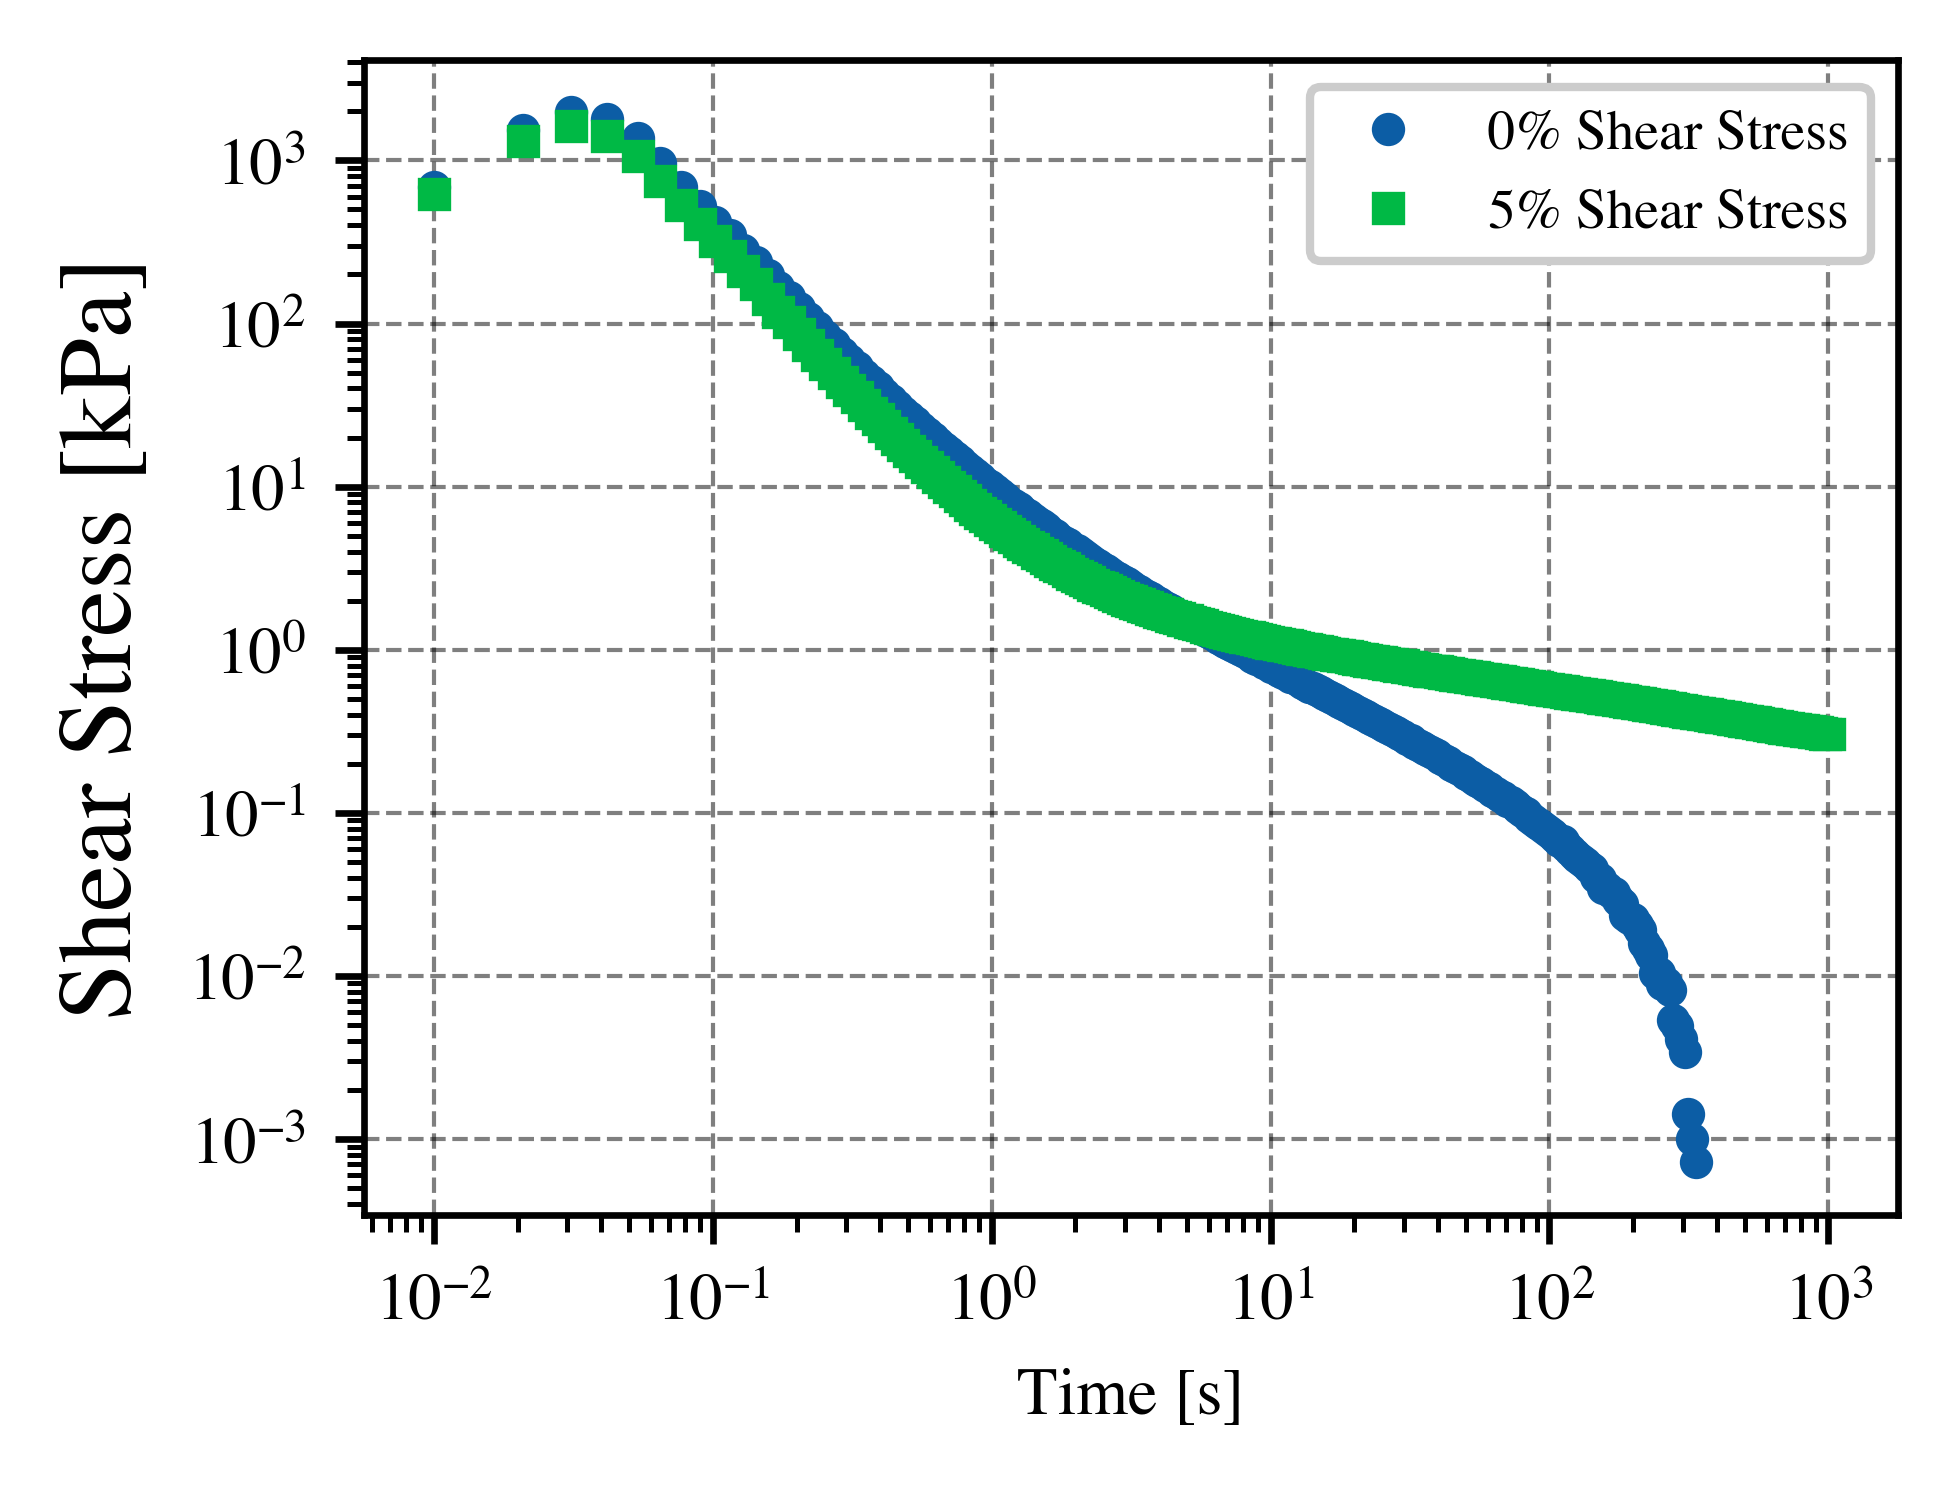

In [119]:
# Normalize the test name to lowercase to match the dictionary keys
test_type = 'Stress relaxation'

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the conditions
for condition in conditions:
    # Normalize the test name to lowercase to match the dictionary keys
    test_name_normalized = f"{test_type.lower()} = {condition.lower()}"

    # Access the DataFrame using the normalized test name
    specific_test_df = dfs.get(test_name_normalized)

    if specific_test_df is not None:
        # Now you can work with specific_test_df
        print(specific_test_df.head())  # Display the first few rows as an example

        # Convert 'Time [s]' column to numeric, assuming it's in the correct format
        specific_test_df['Time [s]'] = pd.to_numeric(specific_test_df['Time [s]'], errors='coerce')

        # Drop any rows that have NaN values in the columns we're interested in after conversion (shear stress)
        specific_test_df.dropna(subset=['Shear Stress [Pa]'], inplace=True)
        #convert shear stress to kpa
        specific_test_df['Shear Stress [Pa]'] = specific_test_df['Shear Stress [Pa]'] / (10^3)

        # Scatter plot for Shear Stress
        ax.plot(specific_test_df['Time [s]'], specific_test_df['Shear Stress [Pa]'], label=f'{condition} Shear Stress')

    else:
        print(f"DataFrame for {test_name_normalized} not found.")

# Set scale to log for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Adding title and labels
ax.set_xlabel('Time [s]')
ax.set_ylabel('Shear Stress [kPa]', fontsize=12.5)

# Adding legend
ax.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value

# Show plot
plt.show()


# Creep test

DataFrame for creep + relax = 10% not found.
DataFrame for creep + relax = 15% not found.
DataFrame for creep + relax = 20% not found.
DataFrame for creep + relax = 25% not found.


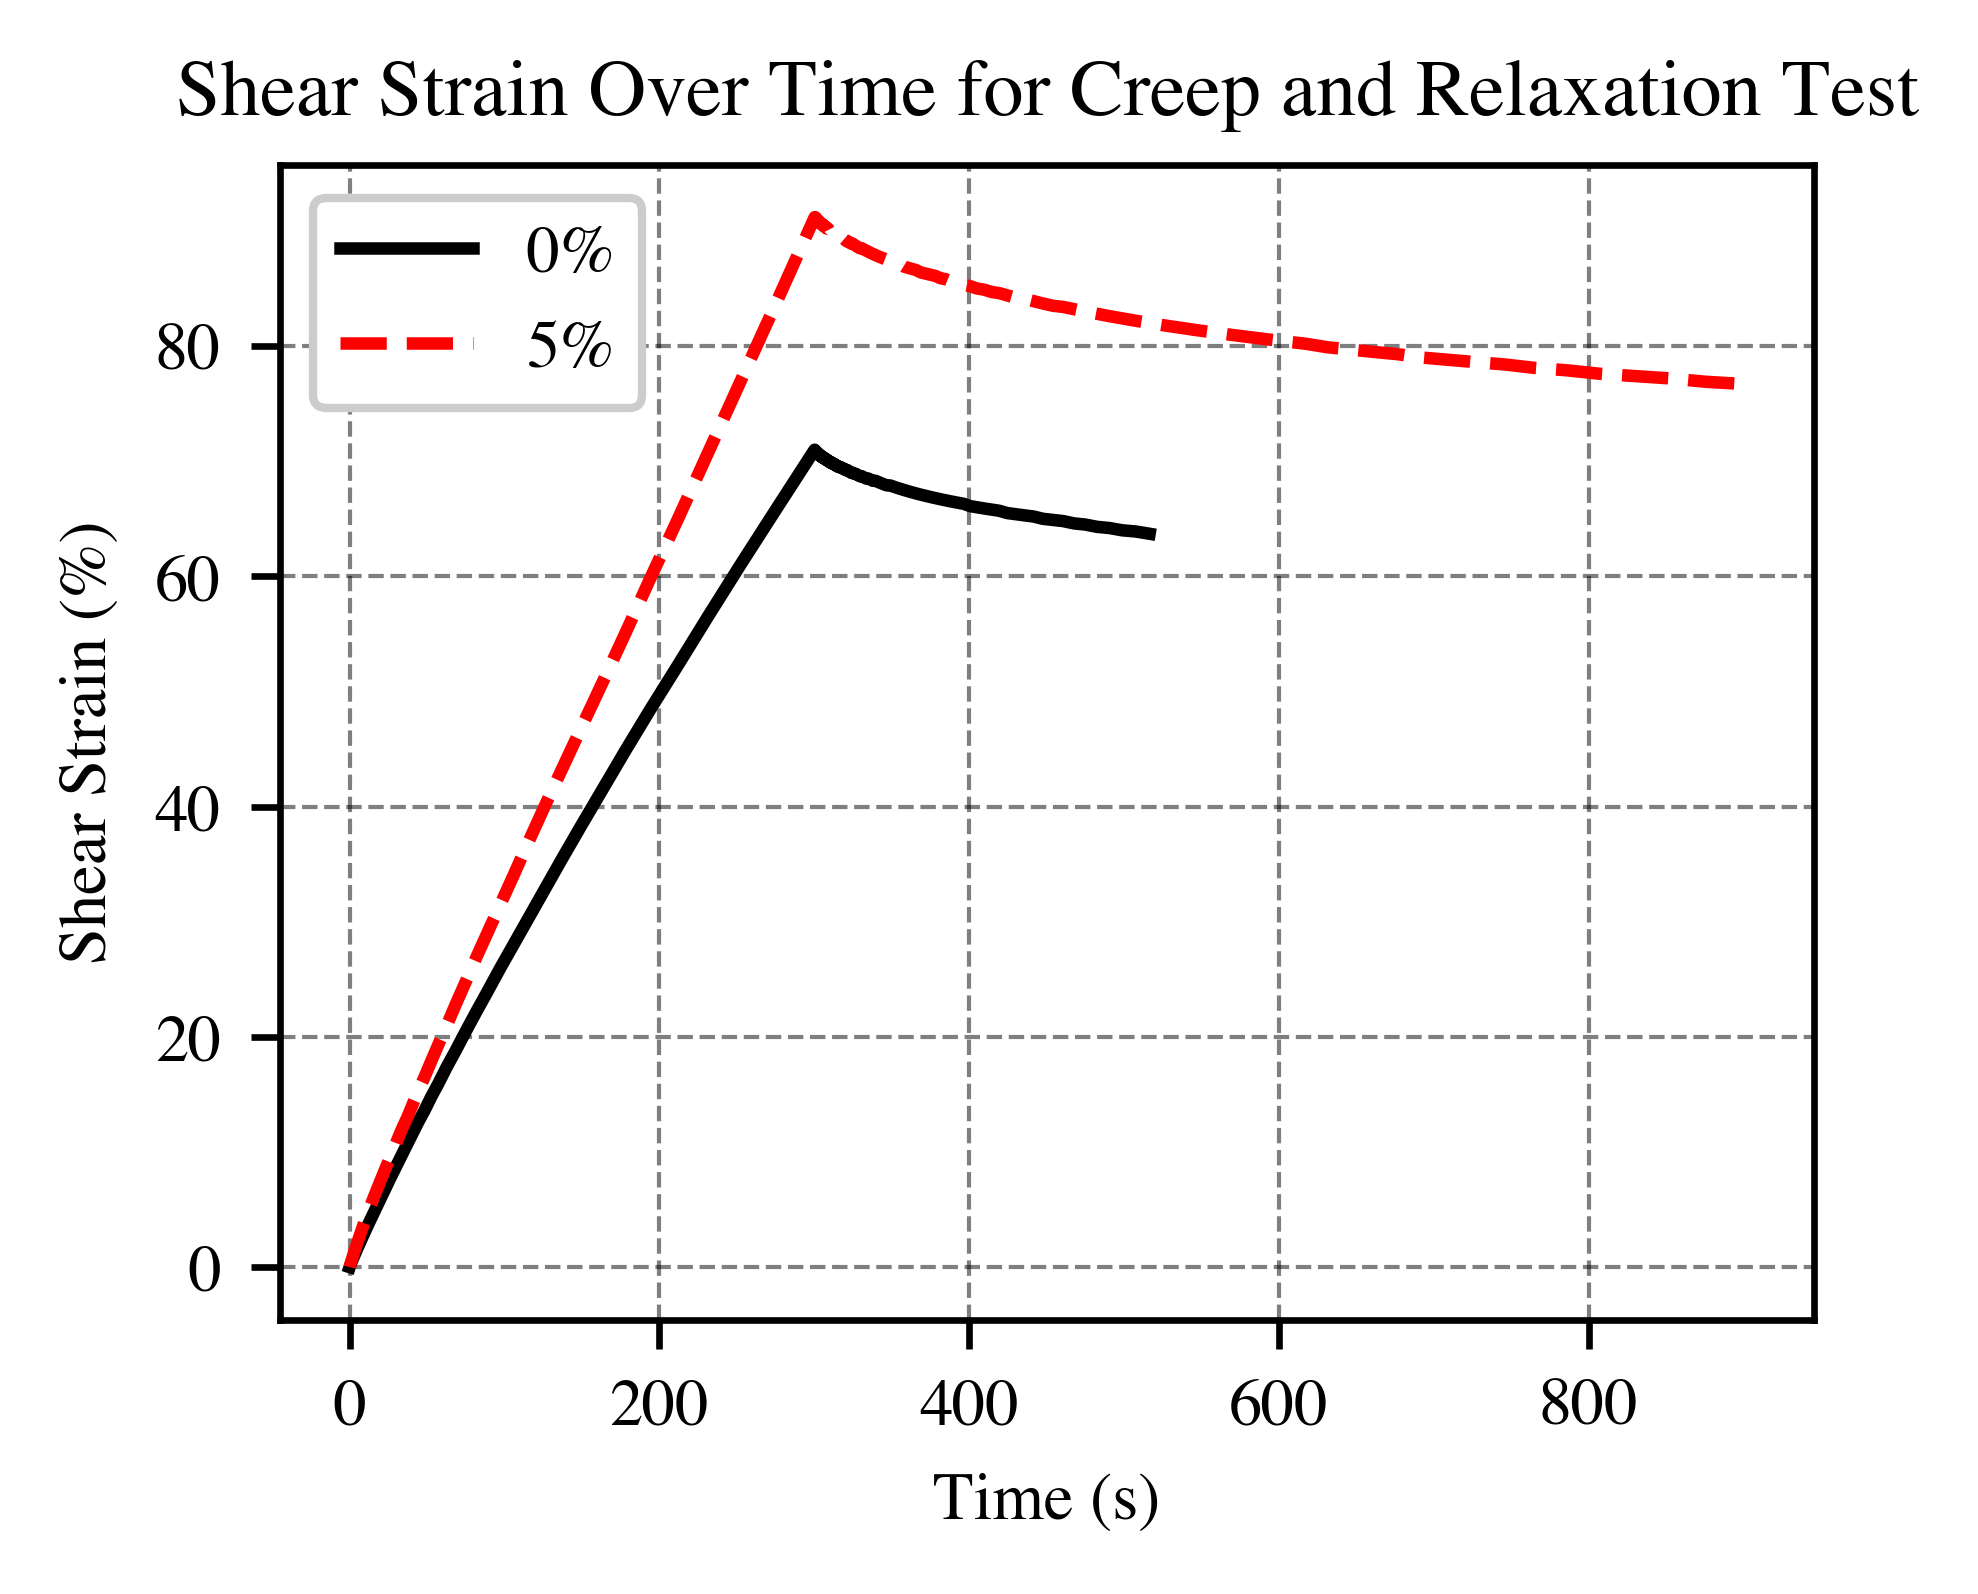

In [120]:
plt.style.use(['ieee', 'grid'])

# Define the test type
test_type = 'creep + relax'

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the conditions
for condition in conditions:
    # Normalize the test name to lowercase to match the dictionary keys
    test_name_normalized = f"{test_type.lower()} = {condition}"

    # Access the DataFrame using the normalized test name
    specific_test_df = dfs.get(test_name_normalized)

    if specific_test_df is not None:
        # Convert the 'Time [s]' and 'Shear Strain [%]' columns to numeric, handling non-numeric values
        specific_test_df['Time [s]'] = pd.to_numeric(specific_test_df['Time [s]'], errors='coerce')
        specific_test_df['Shear Strain [%]'] = pd.to_numeric(specific_test_df['Shear Strain [%]'], errors='coerce')

        # Plot the data for the specific condition
        ax.plot(specific_test_df['Time [s]'], specific_test_df['Shear Strain [%]'], label=f'{condition}')

    else:
        print(f"DataFrame for {test_name_normalized} not found.")

# Labeling the axes
ax.set_xlabel('Time (s)')
ax.set_ylabel('Shear Strain (%)')

# Adding title and legend
ax.set_title('Shear Strain Over Time for Creep and Relaxation Test')
ax.legend()

# Show plot
plt.show()


# Temperature sweep test

   Point No. Time [s] Test Time [s] Temperature [°C] Storage Modulus [Pa]  \
0        1.0        6         11.76           100.02                48260   
1        2.0       12         17.76            99.79                48074   
2        3.0       18         23.76            98.86                48462   
3        4.0       24         29.76            98.01                48944   
4        5.0       30         35.76            96.99                49717   

  Loss Modulus [Pa] Loss Factor [1] Complex Viscosity [mPa·s] Gap [mm]  \
0            108560            2.25                   1890900    1.025   
1            108310            2.25                   1886000    1.025   
2            108890            2.25                   1896900    1.025   
3            109490            2.24                   1908800    1.025   
4            110540            2.22                   1929000    1.025   

  Torque [µN·m]  
0        2331.4  
1        2731.5  
2          2743  
3        2759.6  
4 

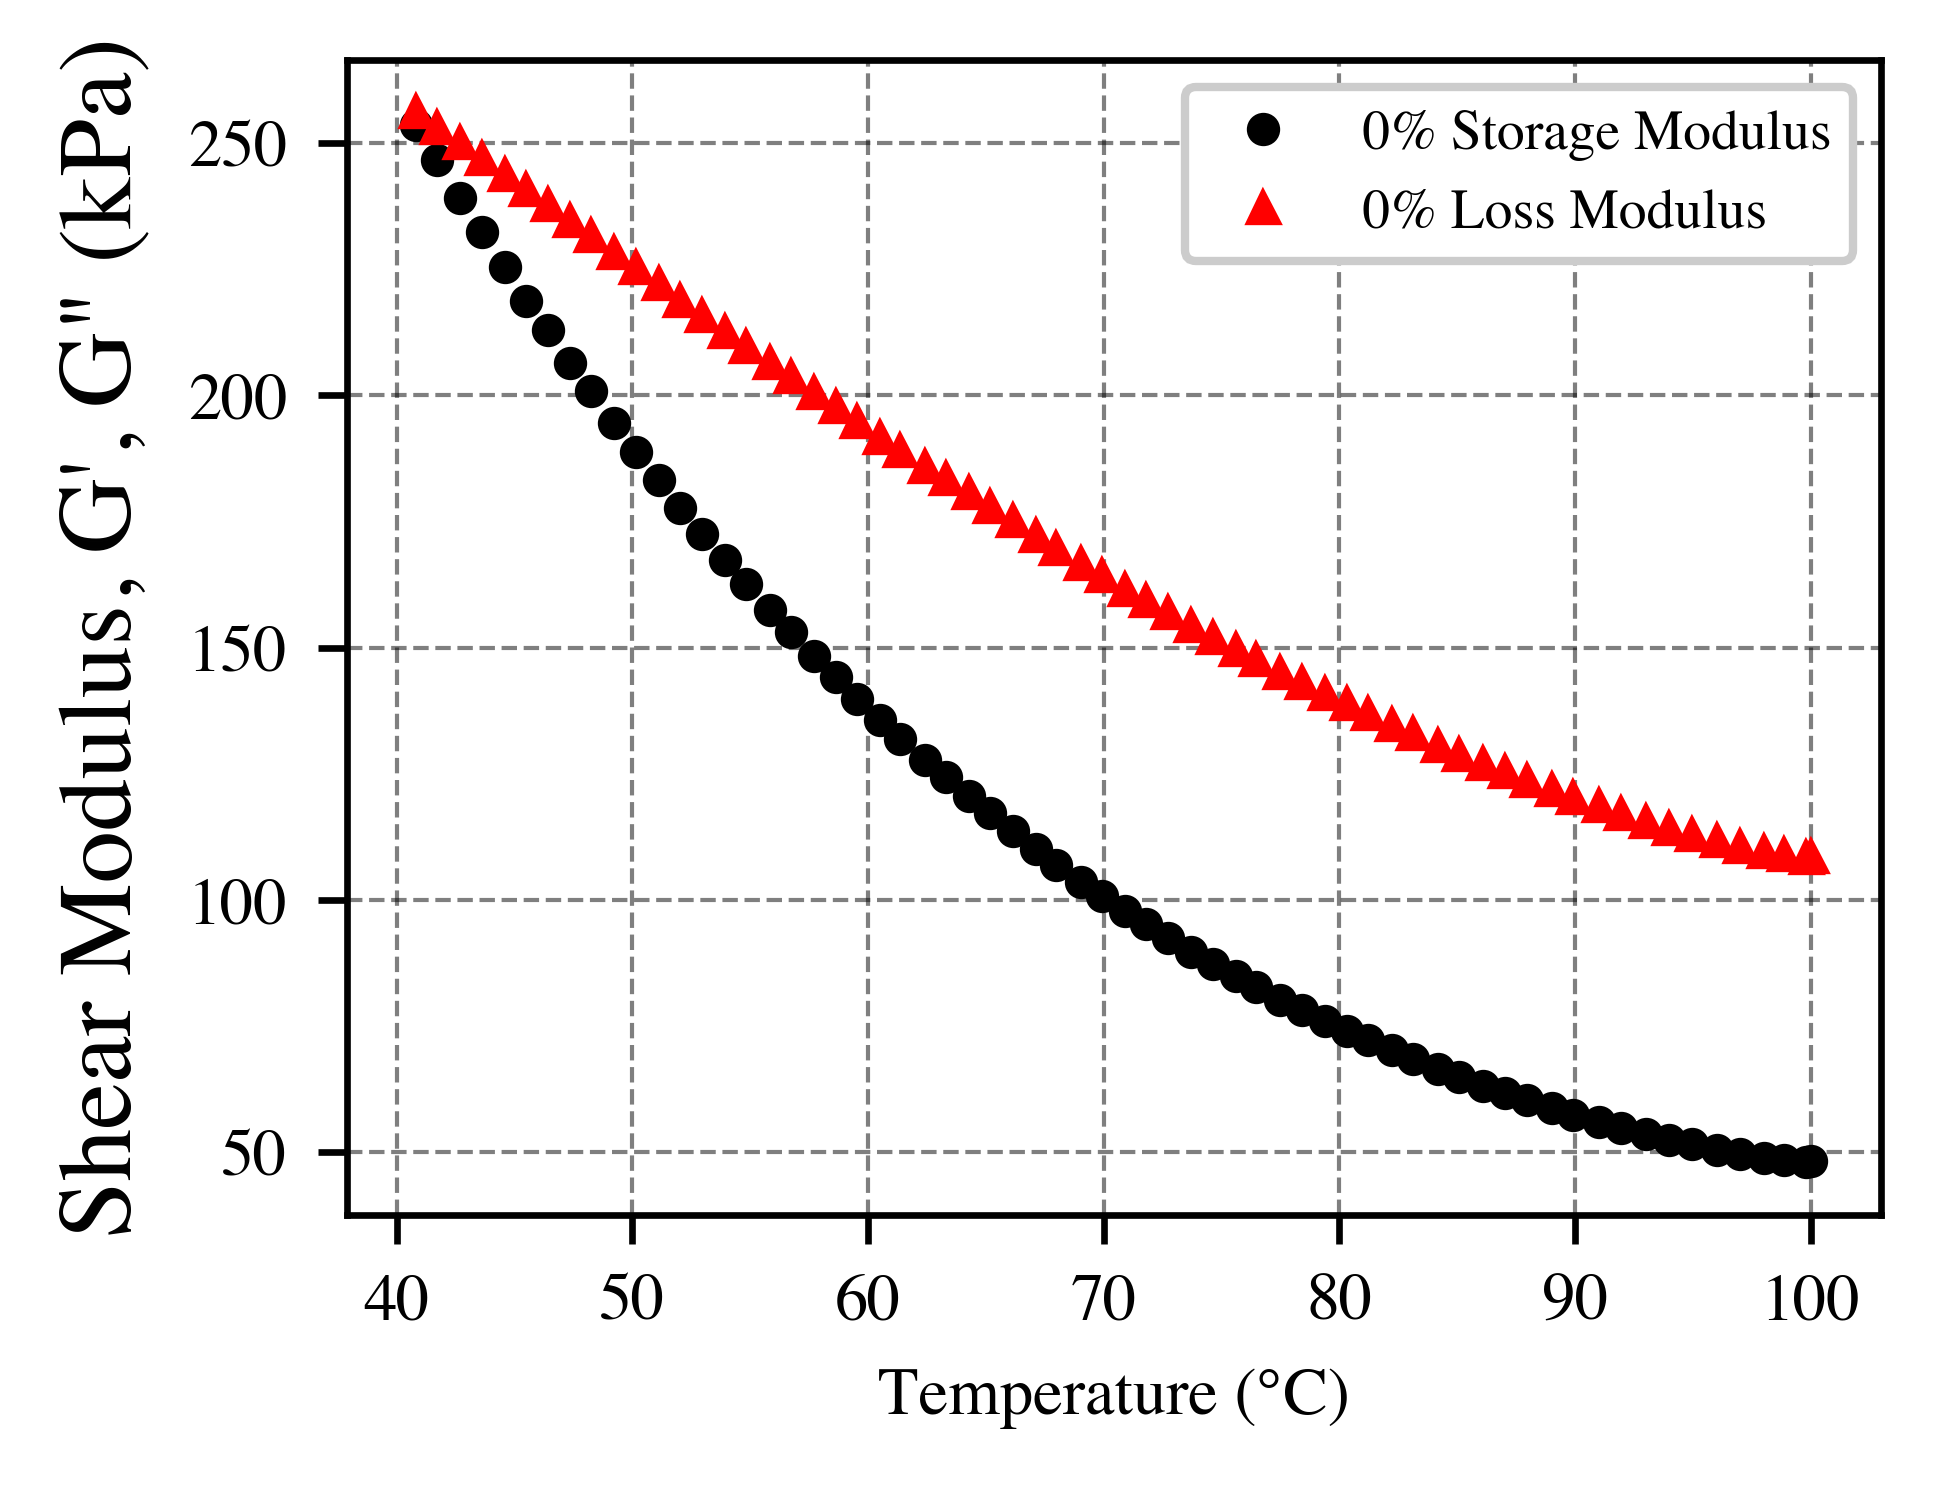

In [121]:
# Normalize the test name to lowercase to match the dictionary keys
test_type = 'temp'

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the conditions
for condition in conditions:
    # Normalize the test name to lowercase to match the dictionary keys
    test_name_normalized = f"{test_type.lower()} = {condition.lower()}"

    # Access the DataFrame using the normalized test name
    specific_test_df = dfs.get(test_name_normalized)

    if specific_test_df is not None:
        # Now you can work with specific_test_df
        print(specific_test_df.head())  # Display the first few rows as an example

        # Convert 'Temperature [°C]' column to numeric, assuming it's in the correct format
        specific_test_df['Temperature [°C]'] = pd.to_numeric(specific_test_df['Temperature [°C]'], errors='coerce')

        # Drop any rows that have NaN values in the columns we're interested in after conversion (storage and loss modulus)
        specific_test_df.dropna(subset=['Temperature [°C]', 'Storage Modulus [Pa]', 'Loss Modulus [Pa]'], inplace=True)
        #convert to kPa
        specific_test_df['Storage Modulus [Pa]'] = specific_test_df['Storage Modulus [Pa]'] / 1000
        specific_test_df['Loss Modulus [Pa]'] = specific_test_df['Loss Modulus [Pa]'] / 1000

        # Scatter plot for Storage Modulus as circles
        ax.plot(specific_test_df['Temperature [°C]'], specific_test_df['Storage Modulus [Pa]'], 'o', label=f'{condition} Storage Modulus')

        # Scatter plot for Loss Modulus as triangles
        ax.plot(specific_test_df['Temperature [°C]'], specific_test_df['Loss Modulus [Pa]'], '^', label=f'{condition} Loss Modulus')

    else:
        print(f"DataFrame for {test_name_normalized} not found.")

# Adding title and labels
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Shear Modulus, G\', G" (kPa)', fontsize=12.5)

# Adding legend
ax.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value

# Show plot
plt.show()